In [1]:
# 데이터 전처리 및 분석 기본 코드
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager

f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [25]:
df = pd.read_csv('./result/면허취득경과년수별 음주운전사고 발생건수 및 구성비.csv',encoding='cp949')

In [14]:
df.head()

,연도,구분,전체,소계(5년미만),1년 미만,1~2년,2~3년,3~4년,4~5년,5~10년,10년 이상,무면허
0,2005,건수,26460,8869.0,1735.0,1395.0,2100.0,1905.0,1734.0,6050.0,8521.0,3020.0
1,2005,비율,100,33.5,6.6,5.3,7.9,7.2,6.6,22.9,32.2,11.4
2,2006,건수,29990,10301.0,1993.0,1912.0,1663.0,1594.0,3139.0,6934.0,9402.0,3353.0
3,2006,비율,100,34.3,6.6,6.4,5.5,5.3,10.5,23.1,31.4,11.2
4,2007,건수,28416,8892.0,1695.0,1781.0,1622.0,1099.0,2695.0,7064.0,9103.0,3357.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   연도          20 non-null     int64  
 2   구분          20 non-null     object 
 3   전체          20 non-null     int64  
 4   소계(5년미만)    20 non-null     float64
 5   1년 미만       20 non-null     float64
 6   1~2년        20 non-null     float64
 7   2~3년        20 non-null     float64
 8   3~4년        20 non-null     float64
 9   4~5년        20 non-null     float64
 10  5~10년       20 non-null     float64
 11  10년 이상      20 non-null     float64
 12  무면허         20 non-null     float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.2+ KB


In [26]:
# 기타에 대하여.
# 운전을 할 때 운전자는 두 부류로 나뉜다. 
# 면허가 있는 사람과, 면허가 없는 사람.
# 위 자료는 면허취득한 사람이 음주운전한 결과이다. 
# 1년 미만부터 10년 이상까지 중간에 빠진 부분이 없다. 운전면허증이 있는 사람은 저 범위 안에 반드시 포함된다.
# https://www.khepi.or.kr/acs/acsStat/result?menuId=-&tableGubun=DATA010408 
# 무면허는 기타에 포함되어 있다고 한다. 
# 기타는 면허가 있음에도 면허를 확인하지 못한 경우와 무면허인 경우가 있을 수 있지만, 사실상 둘 다 최종적으로는 무면허로 처리가 될 것이다.
# 왜냐하면, 최종적으로 면허가 확인되면 1년 미만부터 10년 이상의 범주 안에 들어갈 수 있기 때문이다.
# 따라서 기타를 무면허로 바꾼다.
df = df.rename(columns={'기타': '무면허'})
df

,year,구분,전체,소계(5년미만),1년 미만,1~2년,2~3년,3~4년,4~5년,5~10년,10년 이상,무면허
0,2005,건수,26460,8869.0,1735.0,1395.0,2100.0,1905.0,1734.0,6050.0,8521.0,3020.0
1,2005,비율,100,33.5,6.6,5.3,7.9,7.2,6.6,22.9,32.2,11.4
2,2006,건수,29990,10301.0,1993.0,1912.0,1663.0,1594.0,3139.0,6934.0,9402.0,3353.0
3,2006,비율,100,34.3,6.6,6.4,5.5,5.3,10.5,23.1,31.4,11.2
4,2007,건수,28416,8892.0,1695.0,1781.0,1622.0,1099.0,2695.0,7064.0,9103.0,3357.0
5,2007,비율,100,31.3,6.0,6.3,5.7,3.9,9.5,24.9,32.0,11.8
6,2008,건수,26873,7604.0,1653.0,1466.0,1490.0,1225.0,1770.0,7034.0,9130.0,3105.0
7,2008,비율,100,28.3,6.2,5.5,5.5,4.6,6.6,26.2,34.0,11.5
8,2009,건수,28207,7910.0,1862.0,1687.0,1358.0,1585.0,1413.0,7213.0,10329.0,2755.0
9,2009,비율,100,28.0,6.6,2.0,4.8,5.6,5.0,25.6,36.6,9.8


In [11]:
df.to_csv('./result/면허취득경과년수별 음주운전사고 발생건수 및 구성비.csv', encoding='cp949')

In [27]:
df = df.reset_index(drop=True)
df

,year,구분,전체,소계(5년미만),1년 미만,1~2년,2~3년,3~4년,4~5년,5~10년,10년 이상,무면허
0,2005,건수,26460,8869.0,1735.0,1395.0,2100.0,1905.0,1734.0,6050.0,8521.0,3020.0
1,2005,비율,100,33.5,6.6,5.3,7.9,7.2,6.6,22.9,32.2,11.4
2,2006,건수,29990,10301.0,1993.0,1912.0,1663.0,1594.0,3139.0,6934.0,9402.0,3353.0
3,2006,비율,100,34.3,6.6,6.4,5.5,5.3,10.5,23.1,31.4,11.2
4,2007,건수,28416,8892.0,1695.0,1781.0,1622.0,1099.0,2695.0,7064.0,9103.0,3357.0
5,2007,비율,100,31.3,6.0,6.3,5.7,3.9,9.5,24.9,32.0,11.8
6,2008,건수,26873,7604.0,1653.0,1466.0,1490.0,1225.0,1770.0,7034.0,9130.0,3105.0
7,2008,비율,100,28.3,6.2,5.5,5.5,4.6,6.6,26.2,34.0,11.5
8,2009,건수,28207,7910.0,1862.0,1687.0,1358.0,1585.0,1413.0,7213.0,10329.0,2755.0
9,2009,비율,100,28.0,6.6,2.0,4.8,5.6,5.0,25.6,36.6,9.8


In [28]:
first_column = df.columns[0]
print(first_column)


year


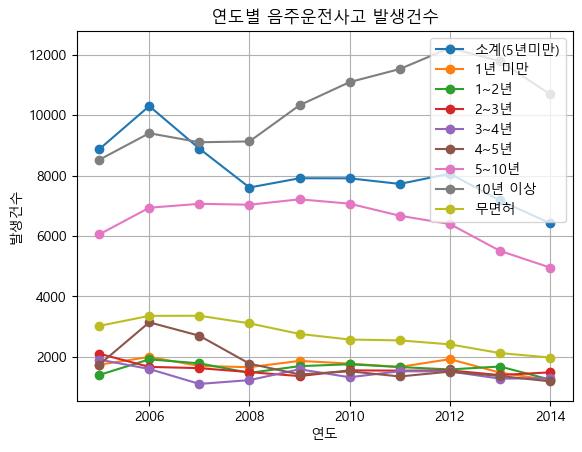

In [33]:
# 구분이 '건수'인 데이터 선택
df = df[df['구분'] == '건수']
df = df.drop('전체', axis=1)

# 그래프 그리기
df.plot(x='year', kind='line', marker='o')
plt.xlabel('연도')
plt.ylabel('발생건수')
plt.title('연도별 음주운전사고 발생건수')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()